<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#File-calling" data-toc-modified-id="File-calling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>File calling</a></span></li><li><span><a href="#Dealing-with-DTA-files" data-toc-modified-id="Dealing-with-DTA-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dealing with DTA files</a></span></li><li><span><a href="#Data-import" data-toc-modified-id="Data-import-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data import</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting</a></span></li></ul></div>

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import math
from pylab import rcParams
from pandas import read_excel
#define sub/superscripts
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
print("C2H5OH".translate(subscript))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
print("PIr2".translate(superscript).replace('PI', 'π'))
import glob

#General params for figures
matplotlib.rcParams['font.family'] = 'arial' 
matplotlib.rcParams['figure.figsize'] = 6, 4.5

C₂H₅OH
πr²


# File calling


In [6]:
x = []

for item in glob.glob(r"C:\Users\jessi\OneDrive - Colostate\Research\CV\SnSb water spikes 050622\*.DTA"):
    x.extend([
        item
    ])
x.sort()
x = [x]
#print(x)

#Can also just call specific values of x via x[0], but I just find this easier 

for num,param in enumerate(x):      #change based on num files
    file1 = param[0]
    file2 = param[1]
    file3 = param[2]
    file4 = param[3]
    file5 = param[4]
files = [[file1,file2,file3,file4,file5]]
    
print(files)

[['C:\\Users\\jessi\\OneDrive - Colostate\\Research\\CV\\SnSb water spikes 050622\\JRG_1_05262022_SnSbonNi_day01_waterexperiments_50C_0rpm_pristine.DTA', 'C:\\Users\\jessi\\OneDrive - Colostate\\Research\\CV\\SnSb water spikes 050622\\JRG_1_05262022_SnSbonNi_day01_waterexperiments_50C_0rpm_pzca01_5wtpcwater.DTA', 'C:\\Users\\jessi\\OneDrive - Colostate\\Research\\CV\\SnSb water spikes 050622\\JRG_1_05262022_SnSbonNi_day01_waterexperiments_50C_0rpm_pzca02_10wtpcwater.DTA', 'C:\\Users\\jessi\\OneDrive - Colostate\\Research\\CV\\SnSb water spikes 050622\\JRG_1_05262022_SnSbonNi_day01_waterexperiments_50C_0rpm_pzca03_15wtpcwater.DTA', 'C:\\Users\\jessi\\OneDrive - Colostate\\Research\\CV\\SnSb water spikes 050622\\JRG_1_05262022_SnSbonNi_day01_waterexperiments_50C_0rpm_pzca04_20wtpcwater.DTA']]


# Dealing with DTA files


In [7]:
import os

def skip_to(fle, line,**kwargs):
    ### fle = input file name, line =  str that signifies start of dataset ###
    if os.stat(fle).st_size == 0:
        raise ValueError("File is empty")
    with open(fle) as f:
        pos = 0
        cur_line = f.readline()
        while not cur_line.startswith(line):
            pos = f.tell()
            cur_line = f.readline()
        f.seek(pos)
        return pd.read_csv(f, **kwargs)

# Data import

In [8]:
df0 = skip_to(file1,"CURVE1",sep="	",usecols=(3,4),names=['Voltage','Current'],skiprows=3)
df0 = df0.apply(pd.to_numeric, errors='coerce')

df5 = skip_to(file2,"CURVE1",sep="	",usecols=(3,4),names=['Voltage','Current'],skiprows=3)
df5 = df5.apply(pd.to_numeric, errors='coerce')

df10 = skip_to(file3,"CURVE1",sep="	",usecols=(3,4),names=['Voltage','Current'],skiprows=3)
df10 = df10.apply(pd.to_numeric, errors='coerce')

df15 = skip_to(file4,"CURVE1",sep="	",usecols=(3,4),names=['Voltage','Current'],skiprows=3)
df15 = df15.apply(pd.to_numeric, errors='coerce')

df20 = skip_to(file5,"CURVE1",sep="	",usecols=(3,4),names=['Voltage','Current'],skiprows=3)
df20 = df20.apply(pd.to_numeric, errors='coerce')



# Plotting

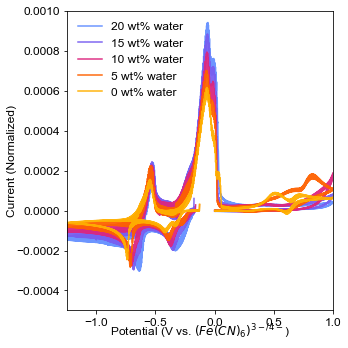

In [24]:

matplotlib.rcParams['figure.figsize'] = 5,5 
matplotlib.rcParams['font.family'] = 'arial' 
matplotlib.rcParams['font.size']=12


dfs=[df0,df5,df10,df15,df20]
dfs.reverse()

labels=['0 wt% water','5 wt% water','10 wt% water','15 wt% water','20 wt% water']
labels.reverse()

plt.ylim(ymin=-0.0005,ymax=0.001)
plt.xlim(-1.25, 1)

colormp = ['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000']

zips=zip(dfs,colormp,labels)

for num,param in enumerate(zips):
    df=param[0]
    Vs=df['Voltage']
    Cs=df['Current']
    color=param[1]
    N=param[2]
    plt.plot(Vs,Cs,label=N,c=color,alpha=0.95)
plt.xlabel('Potential (V vs. $(Fe(CN)_{6})^{3-/4-}$)', ha='center', va='center', fontsize=12)
plt.ylabel('Current (Normalized)', ha='center', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()    
plt.legend(frameon=False)
plt.xlabel('Potential (V vs. $(Fe(CN)_{6})^{3-/4-}$)', ha='center', va='center', fontsize=12)
plt.ylabel('Current (Normalized)', ha='center', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()  

#plt.savefig('CVs_Sn-Sb-Layers-B+Alayering',dpi=300,format='png')